# Modeling the Observed Fluorescence Distribution
This notebook models the observed fluorescence distribution of a disk-like object with the width of a mouse sperm acrosome (200 nm diameter) labeled with Fluo-5N. The observed distribution considers the physical size of the object and the imaging system's resolution, simulated as a Gaussian point spread function (PSF).

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

In [2]:
# Define parameters for the simulation
disk_diameter = 200  # nm (Width of mouse sperm acrosome)
disk_radius = disk_diameter / 2  # nm
pixel_size = 5  # nm/pixel for fine resolution
grid_size = 1000  # nm, size of the simulation grid
emission_wavelength = 516  # nm (Fluo-5N emission)
NA = 1.3  # Numerical aperture of the objective

# Calculate the PSF width and its standard deviation
psf_fwhm = 0.61 * emission_wavelength / NA  # Approximation of the PSF width in nm
psf_sigma = psf_fwhm / (2 * np.sqrt(2 * np.log(2)))  # Convert FWHM to sigma

In [3]:
# Create a 2D grid for the simulation
grid_points = int(grid_size / pixel_size)
x = np.linspace(-grid_size / 2, grid_size / 2, grid_points)
y = np.linspace(-grid_size / 2, grid_size / 2, grid_points)
xx, yy = np.meshgrid(x, y)

In [4]:
# Create a binary mask of the disk
disk = np.sqrt(xx**2 + yy**2) <= disk_radius
disk = disk.astype(float)

In [5]:
# Apply the PSF as a Gaussian blur to simulate the observed distribution
psf_sigma_pixels = psf_sigma / pixel_size  # Convert PSF sigma to pixel units
observed_distribution = gaussian_filter(disk, psf_sigma_pixels)

In [6]:
# Calculate the intensity profile along one axis (e.g., x-axis)
profile = observed_distribution[grid_points // 2, :]
fwhm = np.sum(profile > (np.max(profile) / 2)) * pixel_size  # FWHM in nm

# Print the calculated FWHM
print(f"Calculated FWHM: {fwhm:.1f} nm")

Calculated FWHM: 270.0 nm


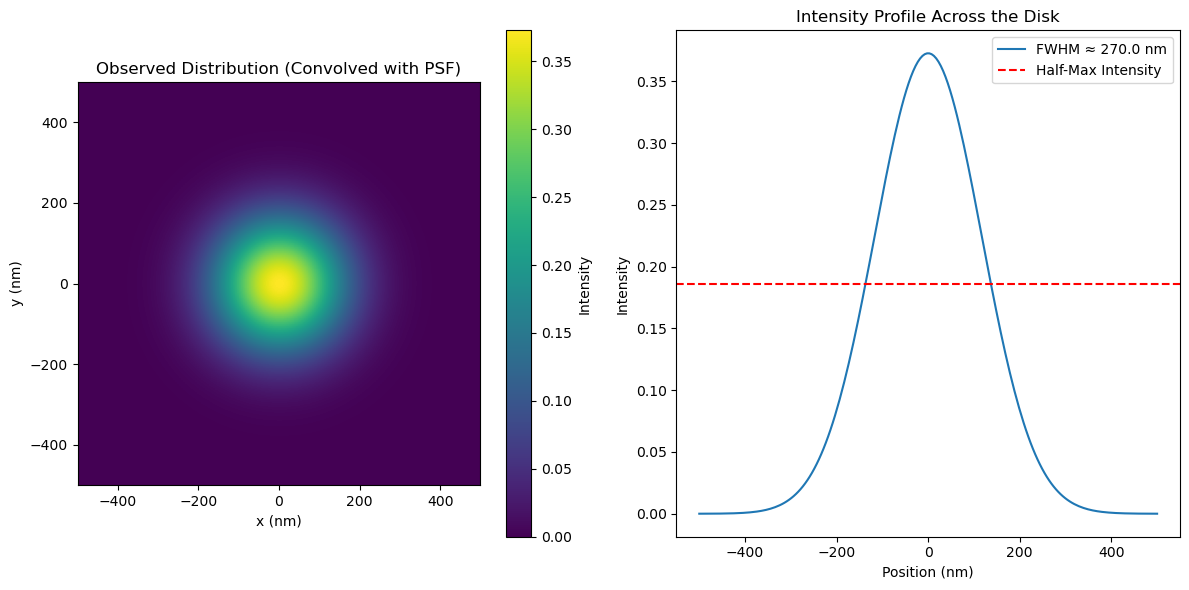

In [7]:
# Plot the observed distribution and intensity profile
plt.figure(figsize=(12, 6))

# 2D visualization of the distribution
plt.subplot(1, 2, 1)
plt.imshow(observed_distribution, extent=[-grid_size/2, grid_size/2, -grid_size/2, grid_size/2], cmap='viridis')
plt.colorbar(label="Intensity")
plt.title("Observed Distribution (Convolved with PSF)")
plt.xlabel("x (nm)")
plt.ylabel("y (nm)")

# Intensity profile
plt.subplot(1, 2, 2)
plt.plot(x, profile, label=f"FWHM ≈ {fwhm:.1f} nm")
plt.axhline(np.max(profile) / 2, color='red', linestyle='--', label="Half-Max Intensity")
plt.title("Intensity Profile Across the Disk")
plt.xlabel("Position (nm)")
plt.ylabel("Intensity")
plt.legend()

plt.tight_layout()
plt.show()

In [8]:
# Compute the full width of the distribution
# Define a threshold for near-zero intensity (e.g., numerical noise level)
threshold = 1e-3 * np.max(profile)  # 0.1% of the maximum intensity

# Find the indices where the intensity is above the threshold
above_threshold = np.where(profile >= threshold)[0]

# Compute the full width of the distribution in nanometers
full_width = (above_threshold[-1] - above_threshold[0]) * pixel_size

print(f"Full Width of the Distribution: {full_width:.1f} nm")

Full Width of the Distribution: 835.0 nm
